<a href="https://colab.research.google.com/github/karthikcs/machine-learning-coe/blob/master/svc/svc_quiz_py_abhinav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/karthikcs/machine-learning-coe/master/svc/data.csv

--2020-10-22 11:48:43--  https://raw.githubusercontent.com/karthikcs/machine-learning-coe/master/svc/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712 (1.7K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.67K  --.-KB/s    in 0s      

2020-10-22 11:48:43 (28.6 MB/s) - ‘data.csv’ saved [1712/1712]



In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

In [3]:
df_data = pd.read_csv('data.csv', header=None, names=['X1','X2','y'])
# Assign the features to the variable X, and the labels to the variable y. 
X = df_data[['X1', 'X2']]
y = df_data['y']


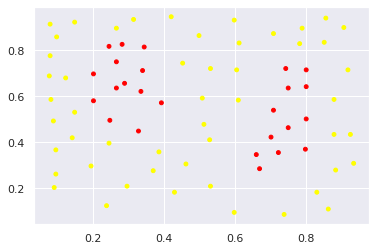

In [28]:
# spliting the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = SVC(kernel='rbf', gamma=24)

# Fit the SVM model
model.fit(X_train,y_train)

# Plotting the data on scatter plot
# Features - X1 & X2
# Target  - y
plt.scatter(X_train['X1'], X_train['X2'], c=y_train, s=15, cmap='autumn');

In [29]:
#model accuracy score with test data 
acc = model.score(X_test,y_test)
print(acc)

0.85


In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

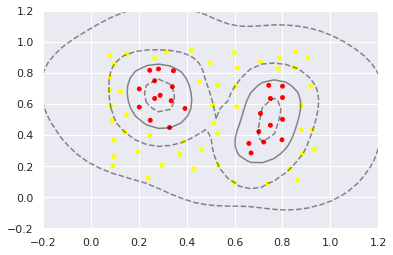

In [30]:
#Plotting the SVM model using plot_svc_decision_function defined above
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlim(-0.2, 1.2) 
ax.set_ylim(-0.2, 1.2) 
plt.scatter(X_train['X1'], X_train['X2'], c=y_train, s=15, cmap='autumn')
plot_svc_decision_function(model);

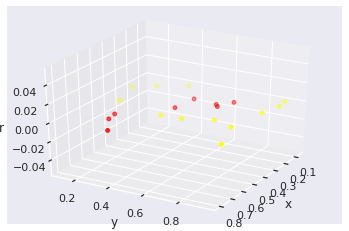

In [ ]:
# 3D View

from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X_test['X1'], X_test['X2'], c=y_test, s=15, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D()